# Zadanie 1

## Mateusz Kowalski

In [2]:
import numpy as np
from math import sqrt
from copy import deepcopy
import matplotlib.pyplot as plt

## Distance and Cost function

In [3]:
def distance(pointA, pointB):
    return sqrt((pointA[0] - pointB[0])**2 + (pointA[1] - pointB[1])**2)

def cost(path):
    cost = 0
    N = len(path)
    for i in range(N):
        cost += distance(path[i], path[(i+1) % N])
    
    return cost

## Swap functions

In [4]:
def arbitrarySwap(path):
    N = len(path)
    a = b = 0
    while a == b:
        a = np.random.randint(0, N)
        b = np.random.randint(0, N)
    
    path[[a,b]] = path[[b,a]]

def consecutiveSwap(path):
    N = len(path)
    a = np.random.randint(0, N)
    b = (a + 1) % N

    path[[a,b]] = path[[b,a]]

## Generate points

In [87]:
def defaultPointsGenerator(N):
    return np.random.uniform(0, 1,(N, 2))

def normalDistributionGenerator(N):
    return np.random.normal(0, 1, (N, 2))

def fourGroupsDistrubutionGenerator(N):
    result = []
    for _ in range(4):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        points = []
        for i in range(N//4):
            X = np.random.normal(-0.02, 0.02)
            Y = np.random.normal(-0.02, 0.02)
            points.append([x + (x*X), y + (y*Y)])
        result.extend(points)
    return np.array(result)

def nineGroupsDistrubutionGenerator(N):
    result = []
    for _ in range(9):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        points = []
        for i in range(N//9):
            X = np.random.normal(-0.02, 0.02)
            Y = np.random.normal(-0.02, 0.02)
            points.append([x + (x*X), y + (y*Y)])
        result.extend(points)
    return np.array(result)
            


## Annealing

In [74]:
def annealing(path, innerIterationLimit, outerIterationLimit, swapType):
    T = 0.5
    initT = T
    Ts = [T]
    noChangesCounter = 0
    
    for outer in range(outerIterationLimit):
        
        for _ in range(innerIterationLimit):
            swapped = deepcopy(path)
            swapType(swapped)
            if cost(swapped) < cost(path):
                path = swapped
                noChangesCounter = 0
            else:
                if np.random.uniform(0,1) < np.exp((cost(swapped) - cost(path)/T)):
                    path = swapped
                    noChangesCounter = 0
                else:
                    noChangesCounter += 1

        
        T *= 0.99
        Ts.append(T)
        
        if outer % (outerIterationLimit // 5) == 0:
            initT *= 0.9
            T = initT
        
    
    return path, Ts

## Solve function

In [75]:
def solve(N, innerIterationLimit, outerIterationLimit, pointGenerator):
    #Arbitrary Swap
    
    points = pointGenerator(N)
    result, Ts = annealing(points, innerIterationLimit, outerIterationLimit, arbitrarySwap)
    
    X = [i for i in range(1, len(Ts) + 1)]
    
    x = result[:,0]
    y = result[:,1]
    x = np.append(x, x[0])
    y = np.append(y, y[0])

    plt.plot(x,y)
    plt.title("After " + str(innerIterationLimit * outerIterationLimit) + " iterations with Arbitrary swap")
    plt.show()
    
    plt.plot(X, Ts)
    plt.title("Temperature with Arbitrary swap")
    plt.show()
    
    #Consecutive Swap
    
    points = pointGenerator(N)
    result, Ts = annealing(points, innerIterationLimit, outerIterationLimit, consecutiveSwap)
    
    X = [i for i in range(1, len(Ts) + 1)]
    
    x = result[:,0]
    y = result[:,1]
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    
    plt.plot(x,y)
    plt.title("After " + str(innerIterationLimit * outerIterationLimit) + " iterations with Consecutive swap")
    plt.show()
    
    plt.plot(X, Ts)
    plt.title("Temperature with Consecutive swap")
    plt.show()

## Plots

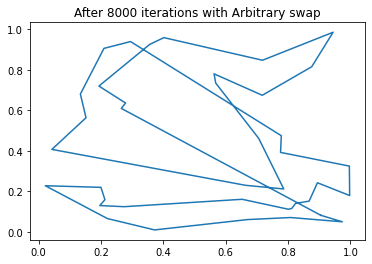

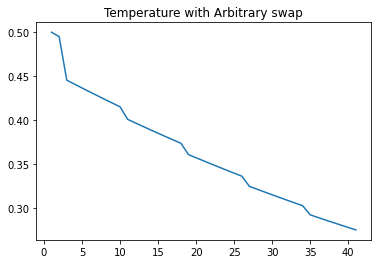

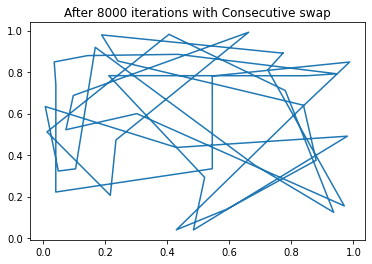

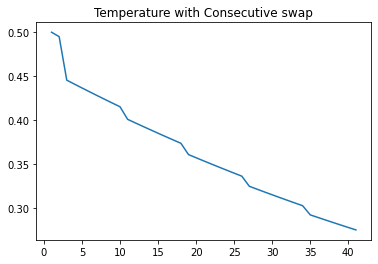

In [71]:
solve(40, 200, 40, defaultPointsGenerator)

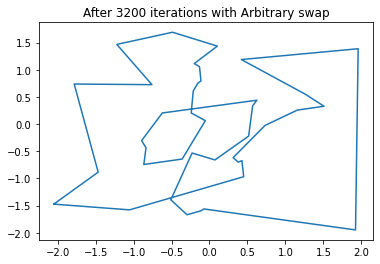

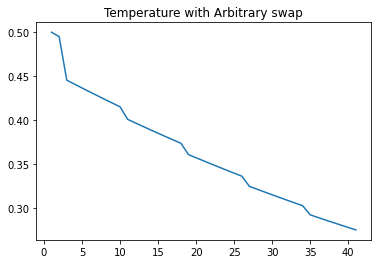

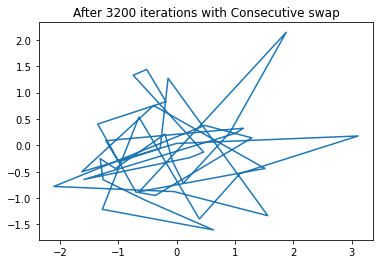

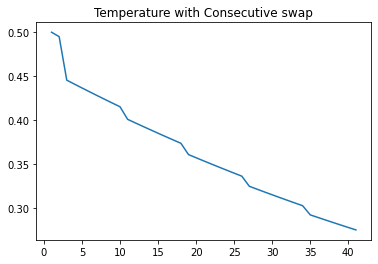

In [70]:
solve(40, 80, 40, normalDistributionGenerator)

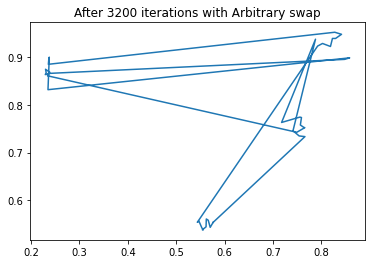

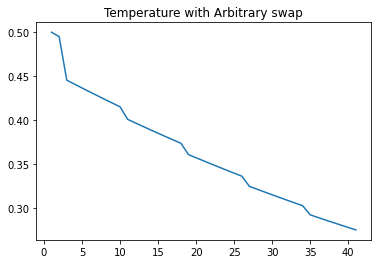

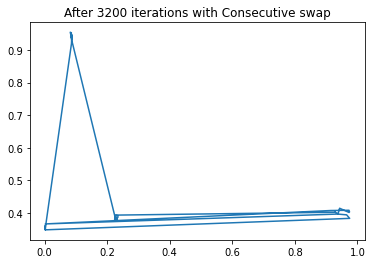

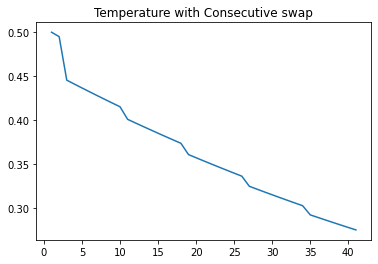

In [91]:
solve(40, 80, 40, fourGroupsDistrubutionGenerator)

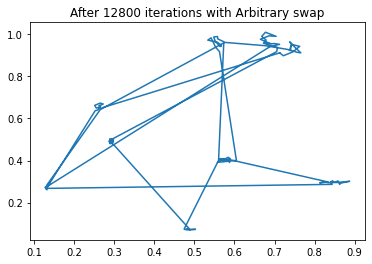

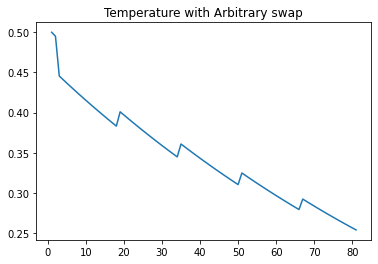

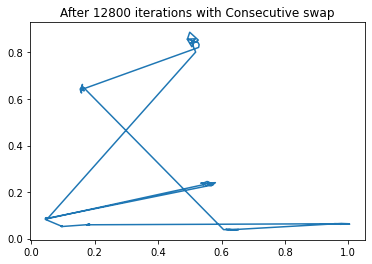

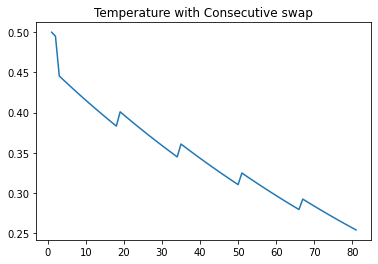

In [90]:
solve(144, 160, 80, nineGroupsDistrubutionGenerator)